In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

import xesmf
import cartopy.crs as ccrs

from ufs2arco import sources

In [2]:
gfs = sources.GFSArchive(
    t0={"start": "2015-03-15T00", "end": "2015-03-15T06", "freq": "6h"},
    fhr={"start": 0, "end": 0, "step": 6},
    variables=["orog"],
)
uds = gfs.open_sample_dataset(
    dims={"t0": gfs.t0[0], "fhr": gfs.fhr[0]},
    open_static_vars=True,
    cache_dir=f"./cache/grid-creation",
)
uds = uds.rename({"latitude": "lat", "longitude": "lon"})

In [3]:
uds = uds.sel(lat=slice(89.9, -89.9))

In [4]:
gds = xesmf.util.grid_global(1/4, 1/4, cf=True, lon1=360)
gds = gds.drop_vars("latitude_longitude")

In [5]:
print(uds.lat.values[:5])
print(gds.lat.values[:5])

[89.75 89.5  89.25 89.   88.75]
[-89.875 -89.625 -89.375 -89.125 -88.875]


In [6]:
print(uds.lon.values[:5])
print(gds.lon.values[:5])

[0.   0.25 0.5  0.75 1.  ]
[0.125 0.375 0.625 0.875 1.125]


In [7]:
gmesh = xesmf.util.grid_global(1, 1, cf=True, lon1=360)
gmesh = gmesh.drop_vars("latitude_longitude")

In [8]:
(.25+.5+.75) / 4

0.375

In [9]:
gm2 = xr.Dataset(
    {
        "lat": np.concatenate([(.375 + np.arange(90)), (-.375 - np.arange(90))]),
    },
)
    

In [10]:
gds = gds.sortby("lat", ascending=False)
gmesh = gmesh.sortby("lat", ascending=False)
gm2 = gm2.sortby("lat", ascending=False)

In [11]:
uds.lat.values

array([ 89.75,  89.5 ,  89.25,  89.  ,  88.75,  88.5 ,  88.25,  88.  ,
        87.75,  87.5 ,  87.25,  87.  ,  86.75,  86.5 ,  86.25,  86.  ,
        85.75,  85.5 ,  85.25,  85.  ,  84.75,  84.5 ,  84.25,  84.  ,
        83.75,  83.5 ,  83.25,  83.  ,  82.75,  82.5 ,  82.25,  82.  ,
        81.75,  81.5 ,  81.25,  81.  ,  80.75,  80.5 ,  80.25,  80.  ,
        79.75,  79.5 ,  79.25,  79.  ,  78.75,  78.5 ,  78.25,  78.  ,
        77.75,  77.5 ,  77.25,  77.  ,  76.75,  76.5 ,  76.25,  76.  ,
        75.75,  75.5 ,  75.25,  75.  ,  74.75,  74.5 ,  74.25,  74.  ,
        73.75,  73.5 ,  73.25,  73.  ,  72.75,  72.5 ,  72.25,  72.  ,
        71.75,  71.5 ,  71.25,  71.  ,  70.75,  70.5 ,  70.25,  70.  ,
        69.75,  69.5 ,  69.25,  69.  ,  68.75,  68.5 ,  68.25,  68.  ,
        67.75,  67.5 ,  67.25,  67.  ,  66.75,  66.5 ,  66.25,  66.  ,
        65.75,  65.5 ,  65.25,  65.  ,  64.75,  64.5 ,  64.25,  64.  ,
        63.75,  63.5 ,  63.25,  63.  ,  62.75,  62.5 ,  62.25,  62.  ,
      

In [12]:
gm3 = uds.coarsen(lat=4, lon=4, boundary="trim").mean()
print(gm3.lat.values[:4])
print(gm3.lon.values[:4])

[89.375 88.375 87.375 86.375]
[0.375 1.375 2.375 3.375]


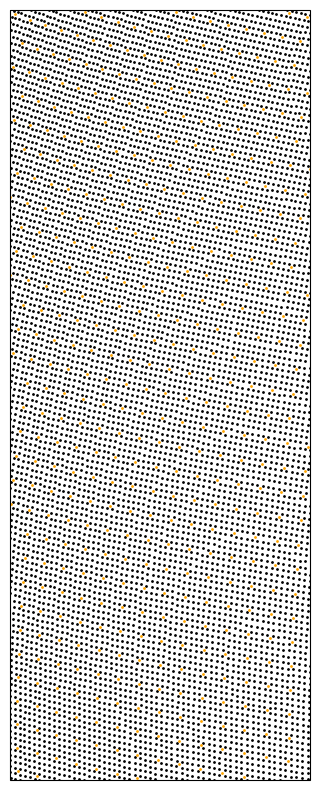

In [25]:
nrows=1
ncols=1
fig, ax = plt.subplots(
    nrows,
    ncols,
    figsize=(ncols*10, nrows*10),
    subplot_kw={"projection": ccrs.Orthographic(central_longitude=-120, central_latitude=20)},
)

for xds, factor, color in zip([uds, gm3], [10, 5], ["black", "orange"]):
    lon, lat = np.meshgrid(xds.lon, xds.lat)
    #ax.scatter(lon[:factor,:factor], lat[:factor, :factor], c=color)
    ax.scatter(lon, lat, c=color, transform=ccrs.PlateCarree(), s=1)
    ax.set_extent([-160, -150, 0, 30], crs=ccrs.PlateCarree())

In [54]:
gm3.to_netcdf(f"latentx4.fromdata.global_quarter_degree.unsorted.nc")

In [18]:
arr = np.load("latentx4.fromdata.global_quarter_degree.sorted.npz")

In [21]:
arr["lat"]

array([  0.375,  -0.625,  24.375, ..., -16.625,  26.375,  89.375],
      shape=(64440,))